# ***The Great Giochini***

Import useful libraries

In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

Path (select yours, comment others)

In [3]:
path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
#path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

Create files list and dataframe

In [4]:
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

### **Polynomial interpolation of time series**

Let's plot a single time series

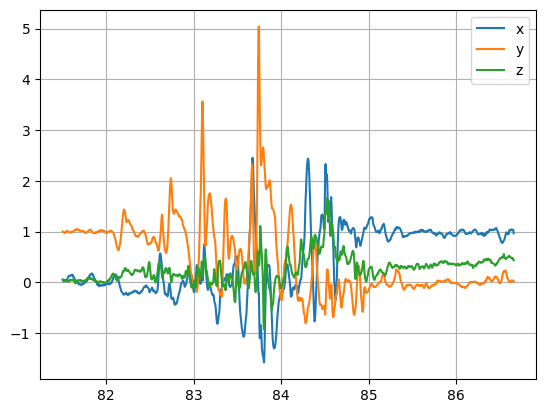

In [6]:
test=148

df = li[test]

x = np.asarray(df.x)
y = np.asarray(df.y)
z = np.asarray(df.z)
t = np.asarray(df.t)

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')

plt.grid()
plt.legend()
plt.show()

This is the polynomial interpolation

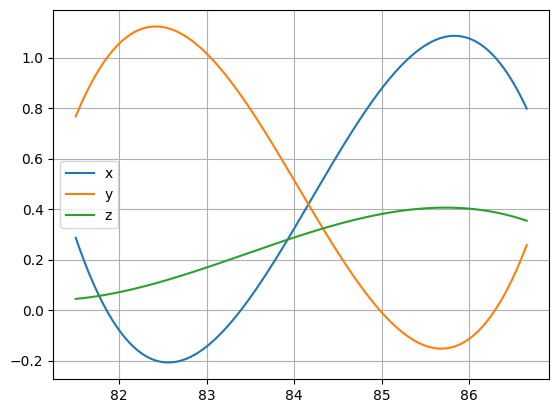

In [7]:
coef_x = np.polyfit(t,x,deg=3,full=False)
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = np.polyfit(t,y,deg=3,full=False)
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = np.polyfit(t,z,deg=3,full=False)
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

Now, we do this for all the time series

In [479]:
def extrapolate(ls,k):

    # Create columns of the output dataset
    columns = []
    for prefix in ['x', 'y', 'z']:
        for i in range(0, k+1):
            columns.append(f"{prefix}_{i}")
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)

        # Get values from every table
        x = np.asarray(ls[i].x)
        y = np.asarray(ls[i].y)
        z = np.asarray(ls[i].z)
        t = np.asarray(ls[i].t)

        # Get coefficients of the polynomial fit of order k of x, y, z
        coef_x = np.polyfit(t,x,deg=k,full=False)
        coef_y = np.polyfit(t,y,deg=k,full=False)
        coef_z = np.polyfit(t,z,deg=k,full=False)
        
        # Add coefficients to the final dataset
        row = []
        for j in np.arange(k+1):
            row.append(coef_x[j])
        for j in np.arange(k+1):
            row.append(coef_y[j])
        for j in np.arange(k+1):
            row.append(coef_z[j])
        df.loc[i] = row

    return df


df = extrapolate(li,5)
df

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.00115,0.28788,-28.91097,"1,450.61801","-36,364.36701","364,348.95941",-0.00081,0.20141,-20.03536,995.98886,"-24,743.33430","245,752.20691",0.00142,-0.35484,35.53462,"-1,778.26593","44,469.66011","-444,569.11876"
1,-0.00043,0.08281,-6.33072,241.46204,"-4,594.69362","34,894.77068",0.00002,-0.00442,0.35789,-14.36813,286.46712,"-2,269.50595",-0.00011,0.02274,-1.80944,71.69976,"-1,415.04128","11,129.97523"
2,-0.00077,0.14785,-11.40334,439.02489,"-8,437.03023","64,746.88804",-0.00011,0.02038,-1.54275,58.30836,"-1,100.27878","8,293.21100",0.00019,-0.03473,2.54069,-92.73901,"1,688.51031","-12,265.23406"
3,0.00018,-0.04731,4.89329,-252.53446,"6,502.09938","-66,812.41228",-0.00077,0.20524,-21.92440,"1,170.31184","-31,217.03116","332,880.71407",0.00001,-0.00202,0.16111,-5.61792,68.64025,152.22053
4,0.00045,-0.13516,16.23613,-974.35256,"29,211.20746","-350,005.76209",0.00012,-0.03448,4.09249,-242.67721,"7,190.04912","-85,150.82316",-0.00087,0.26115,-31.18670,"1,860.75292","-55,468.17645","660,886.34316"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.00157,-0.96196,235.69795,"-28,869.19014","1,767,645.64664","-43,284,015.84477",0.00172,-1.05296,257.97094,"-31,594.35662","1,934,325.21433","-47,360,981.83228",0.00035,-0.21516,52.75475,"-6,466.49240","396,262.29089","-9,711,662.65812"
464,-0.01217,5.81466,"-1,110.85756","106,096.63531","-5,065,866.36107","96,739,688.80915",0.01226,-5.85869,"1,119.30549","-106,905.52707","5,104,523.01161","-97,477,341.21811",-0.00411,1.96343,-375.50263,"35,902.11790","-1,716,078.29328","32,806,059.24496"
465,-0.01689,8.23931,"-1,607.80890","156,853.72537","-7,650,184.06464","149,229,801.60276",0.01713,-8.36399,"1,632.94654","-159,384.36165","7,777,406.19737","-151,785,146.23110",-0.00546,2.66401,-519.41970,"50,630.90182","-2,467,328.75356","48,088,637.33054"
466,-0.00051,0.27288,-58.47080,"6,263.06928","-335,369.39929","7,181,878.81938",0.00039,-0.21035,45.86423,"-4,996.05126","271,901.18894","-5,914,597.08619",0.00020,-0.11171,24.59544,"-2,703.83031","148,423.53691","-3,254,917.03866"


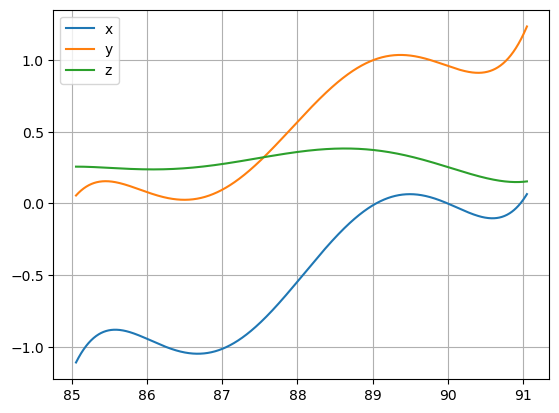

In [480]:
coef_x = df.iloc[test,:6]
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = df.iloc[test,6:12]
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = df.iloc[test,12:]
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

### **Splines**

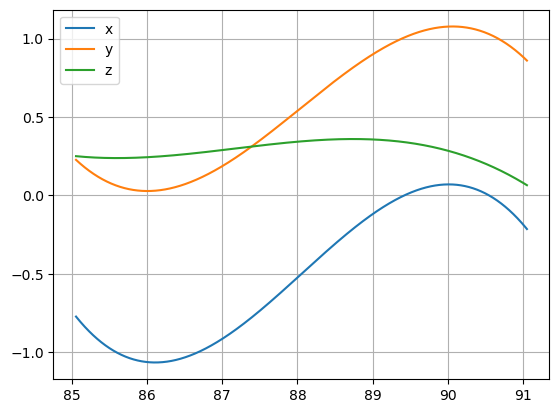

In [481]:
tck_x = splrep(t,x,s=25)
spline_x = splev(t,tck_x)

tck_y = splrep(t,y,s=25)
spline_y = splev(t,tck_y)

tck_z = splrep(t,z,s=25)
spline_z = splev(t,tck_z)

plt.plot(t,spline_x,label='x')
plt.plot(t,spline_y,label='y')
plt.plot(t,spline_z,label='z')

plt.grid()
plt.legend()
plt.show()


### **Length**

In [482]:
def extrapolen(ls):

    # Create columns of the output dataset
    columns = ['len']
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)
        t = np.asarray(ls[i].t)
        row = len(t)
        df.loc[i] = row
    return df


dflen = extrapolen(li)
dflen

,len
0,1336
1,1674
2,1518
3,1457
4,1838
...,...
463,1838
464,1194
465,1160
466,1805


<AxesSubplot:>

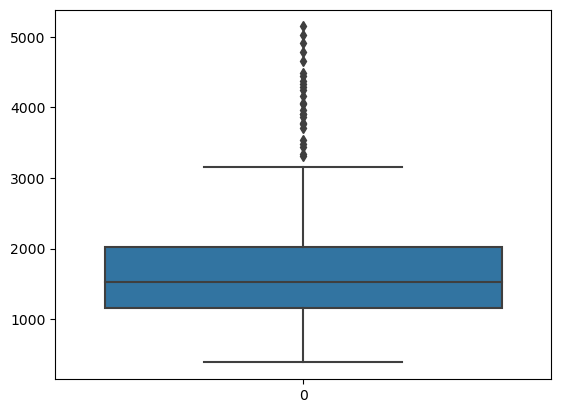

In [411]:
sns.boxplot(dflen.len)

(array([ 35., 148., 122.,  78.,  52.,   7.,   6.,   9.,   7.,   4.]),
 array([ 388. ,  863.8, 1339.6, 1815.4, 2291.2, 2767. , 3242.8, 3718.6,
        4194.4, 4670.2, 5146. ]),
 <BarContainer object of 10 artists>)

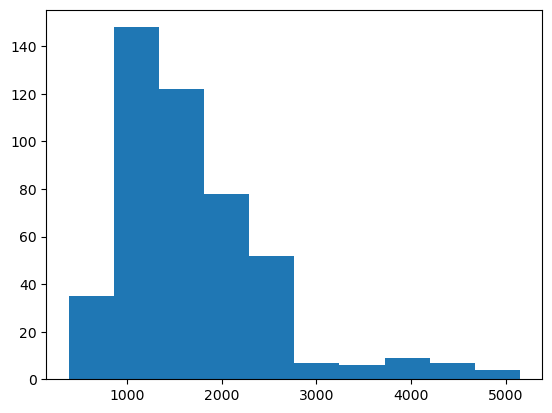

In [412]:
plt.hist(dflen.len)

In [413]:
dfc = pd.read_csv('classes.csv')
dfc

dflc = pd.concat([dflen,dfc],axis=1)
dflc

,len,code,class
0,1336,MR,1
1,1674,MR,1
2,1518,MR,1
3,1457,MR,1
4,1838,MR,1
...,...,...,...
463,1838,FB,2
464,1194,FF,2
465,1160,FF,2
466,1805,FS,2


<AxesSubplot:xlabel='class', ylabel='len'>

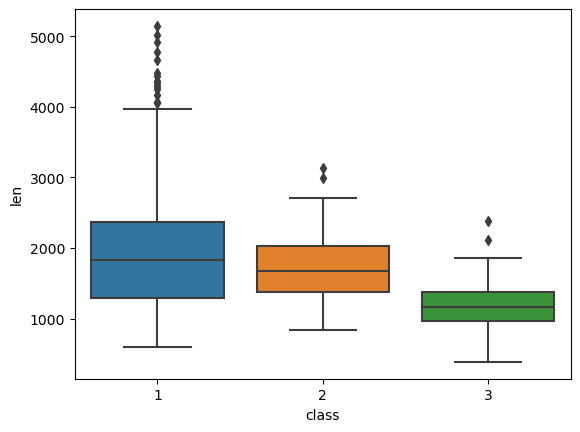

In [414]:
sns.boxplot(x='class',y='len', data=dflc)

### **Parameter Selection**

#### Means

<AxesSubplot:xlabel='class'>

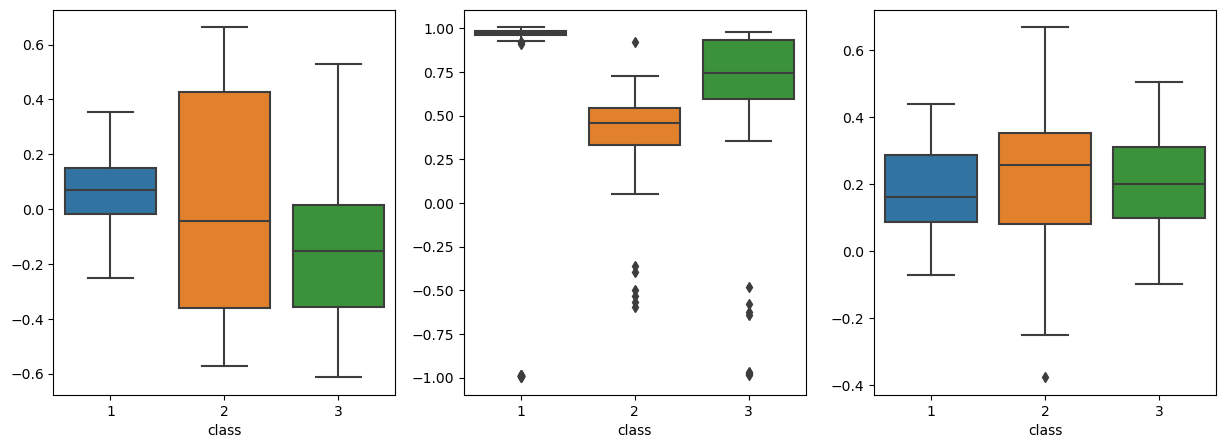

In [415]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=dfc,ax=axs[2])

##### Variances

<AxesSubplot:xlabel='class'>

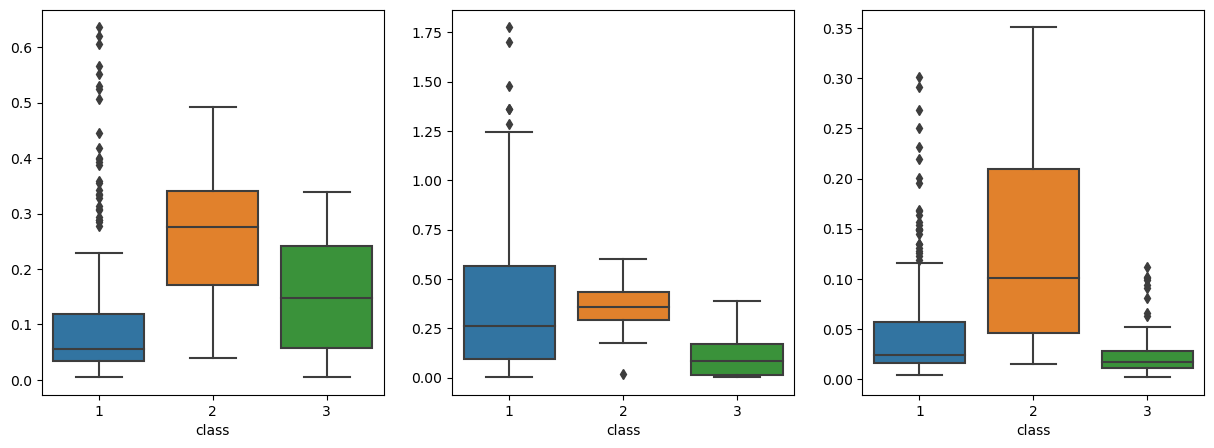

In [416]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=dfc,ax=axs[2])

#### Max - Min & argMax - argMin

<AxesSubplot:xlabel='class'>

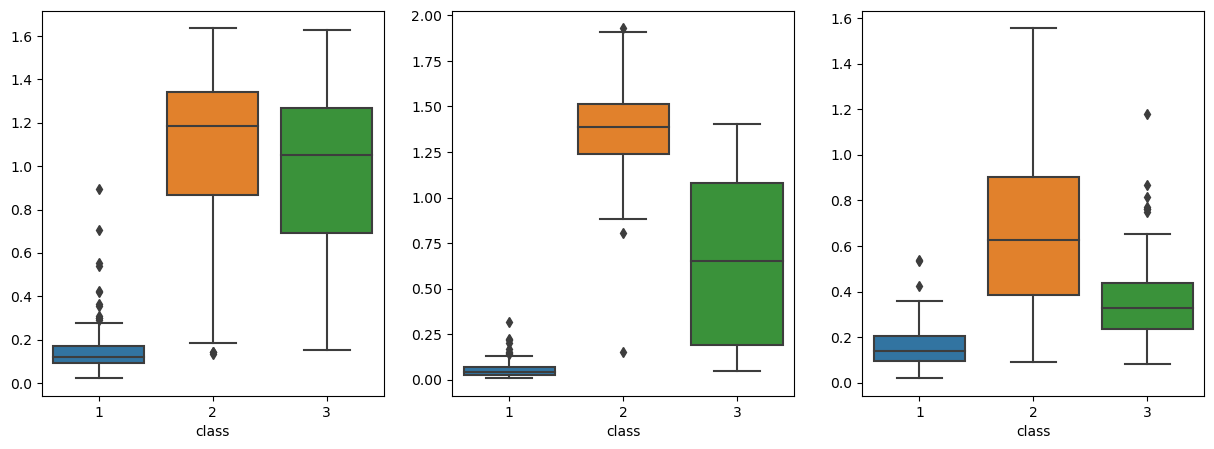

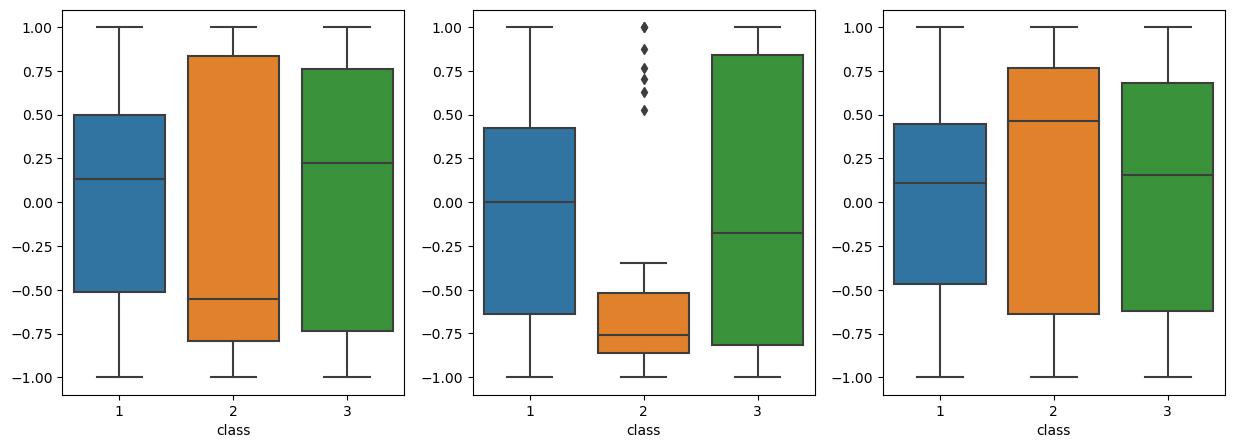

In [417]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(df)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t)

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=dfc,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=dfc,ax=axs[2])


#### Peaks over Threshold

<AxesSubplot:xlabel='class'>

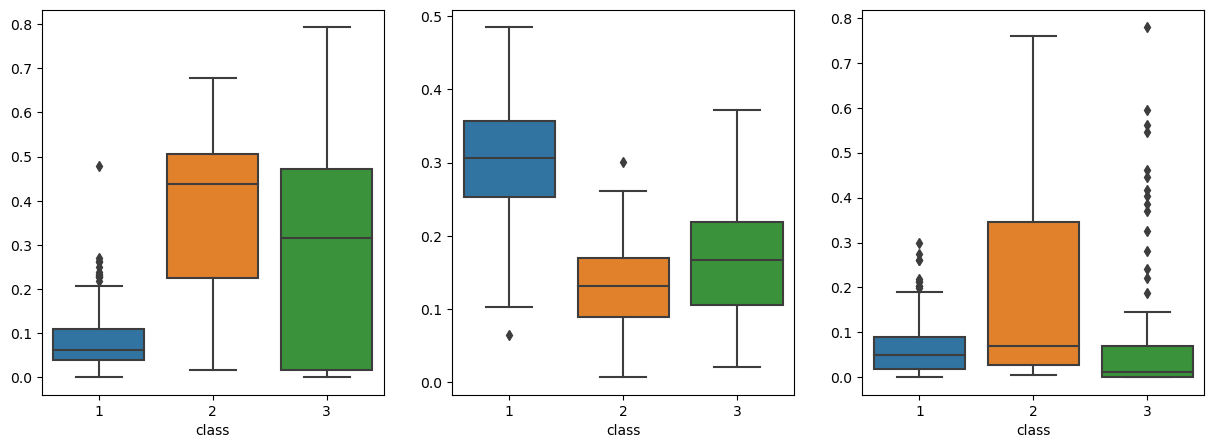

In [418]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=dfc,ax=axs[2])

#### Positive/Tot

<AxesSubplot:xlabel='class'>

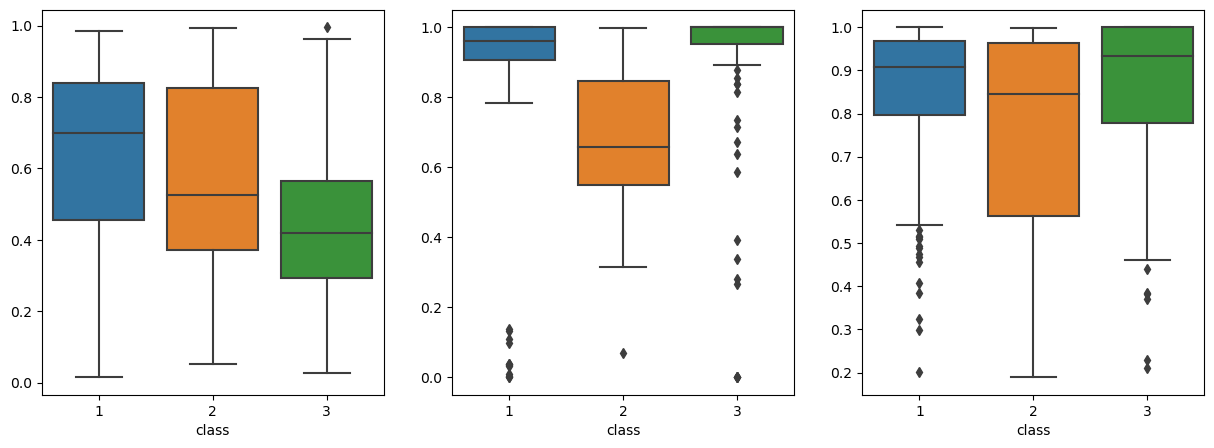

In [419]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=dfc,ax=axs[2])

#### Energy

<AxesSubplot:xlabel='class'>

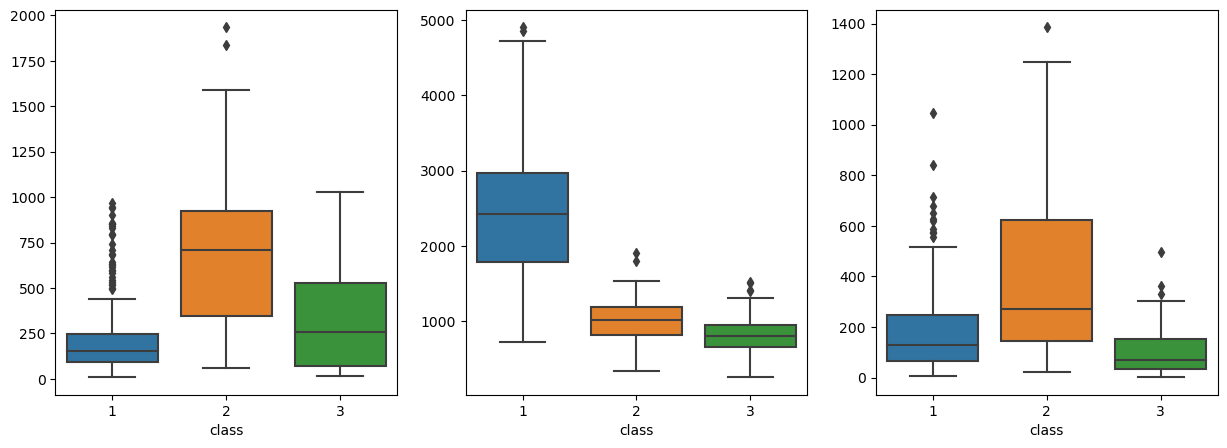

In [420]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=dfc,ax=axs[2])

#### Power

<AxesSubplot:xlabel='class'>

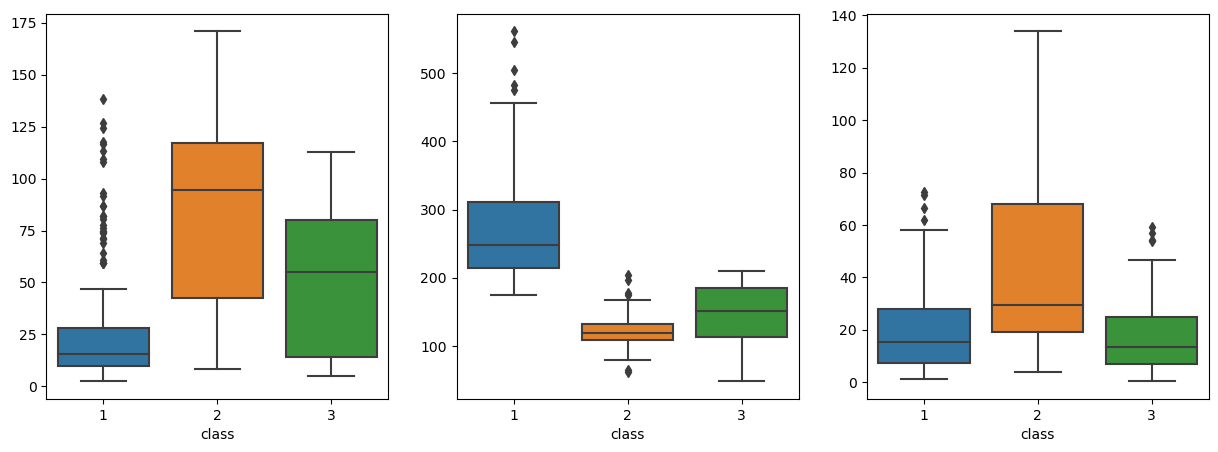

In [421]:
powers_x = []
powers_y = []
powers_z = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=dfc,ax=axs[2])

#### Median

<AxesSubplot:xlabel='class'>

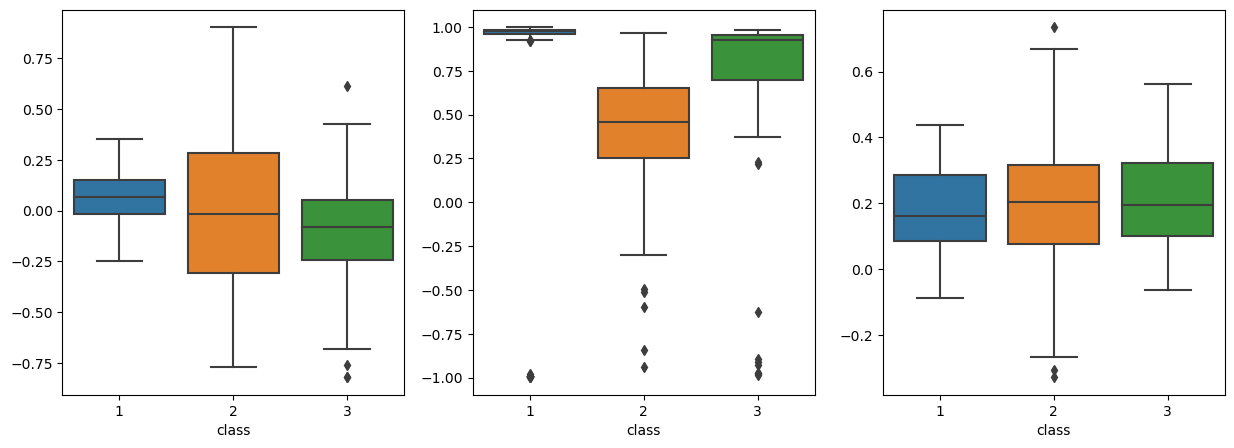

In [422]:
median_x = []
median_y = []
median_z = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    median_x.append(np.median(poly_x(t)))

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    median_y.append(np.median(poly_y(t)))

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    median_z.append(np.median(poly_z(t)))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=dfc,ax=axs[2])



#### Mode

<AxesSubplot:xlabel='class'>

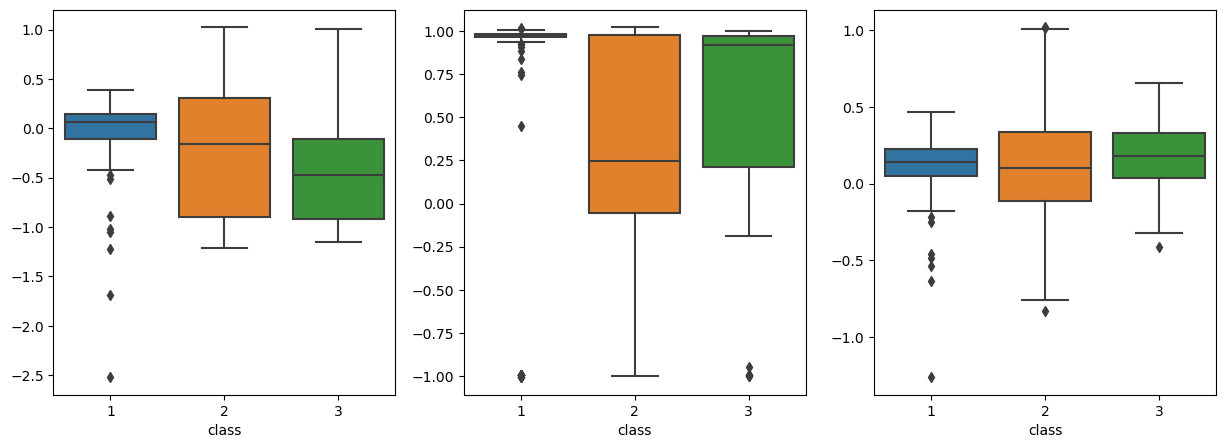

In [423]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x, keepdims = True)[0][0])
    mode_y.append(stats.mode(li[i].y, keepdims = True)[0][0])
    mode_z.append(stats.mode(li[i].z, keepdims = True)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=dfc,ax=axs[2])


#### Skewness

<AxesSubplot:xlabel='class'>

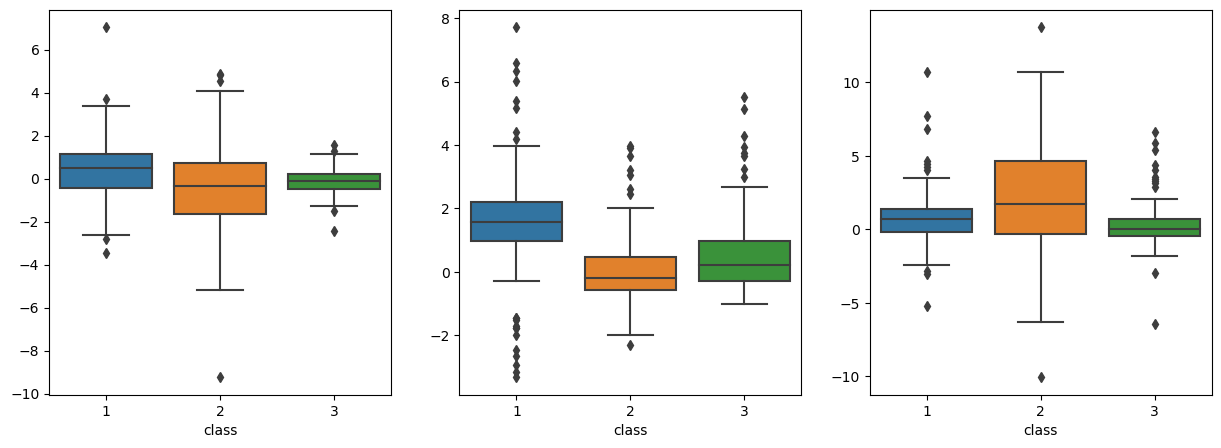

In [424]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=dfc,ax=axs[2])



#### Kurtosis

(-10.0, 160.0)

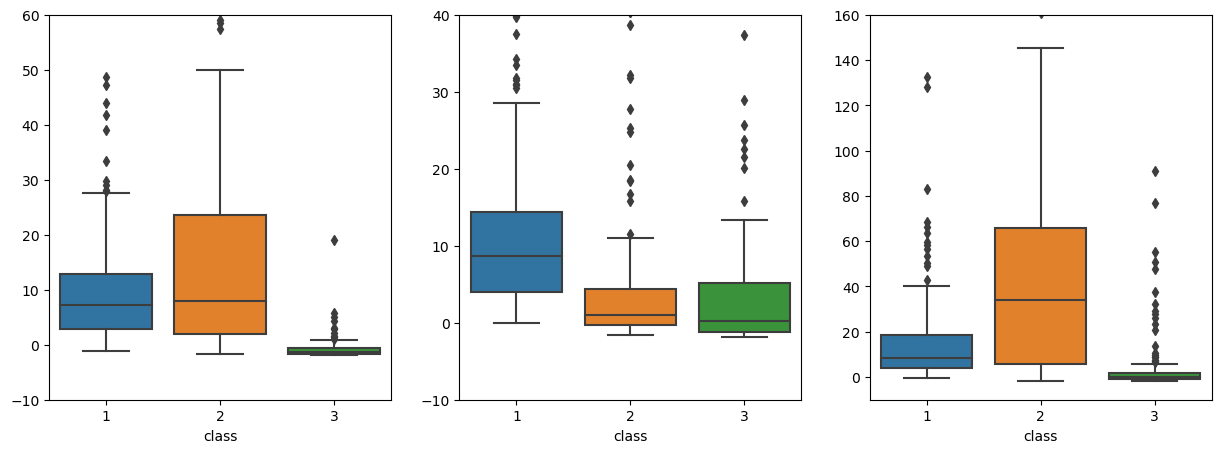

In [425]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=dfc,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=dfc,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=dfc,ax=axs[2])
axs[2].set_ylim(-10,160)



#### RMS

<AxesSubplot:xlabel='class'>

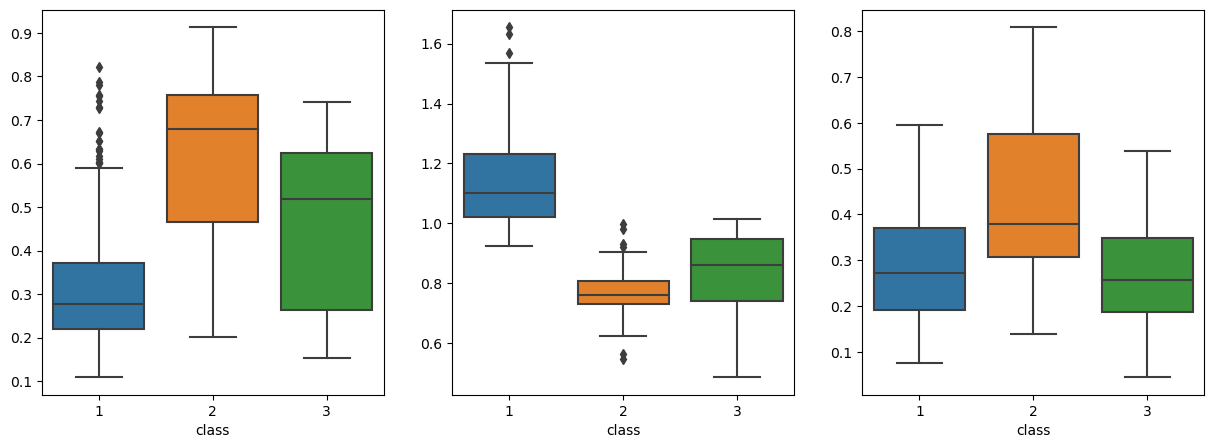

In [426]:
rms_x = []
rms_y = []
rms_z = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=dfc,ax=axs[2])




#### Temporal_centroid

<AxesSubplot:xlabel='class'>

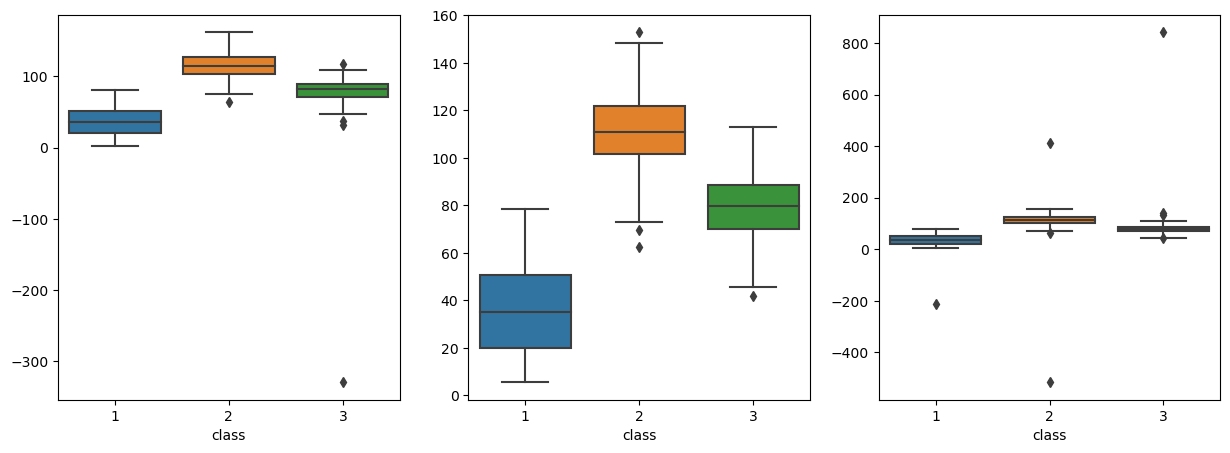

In [427]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []

for i in np.arange(len(li)):
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=dfc,ax=axs[2])

#### Zero Crossing Points

<AxesSubplot:xlabel='class'>

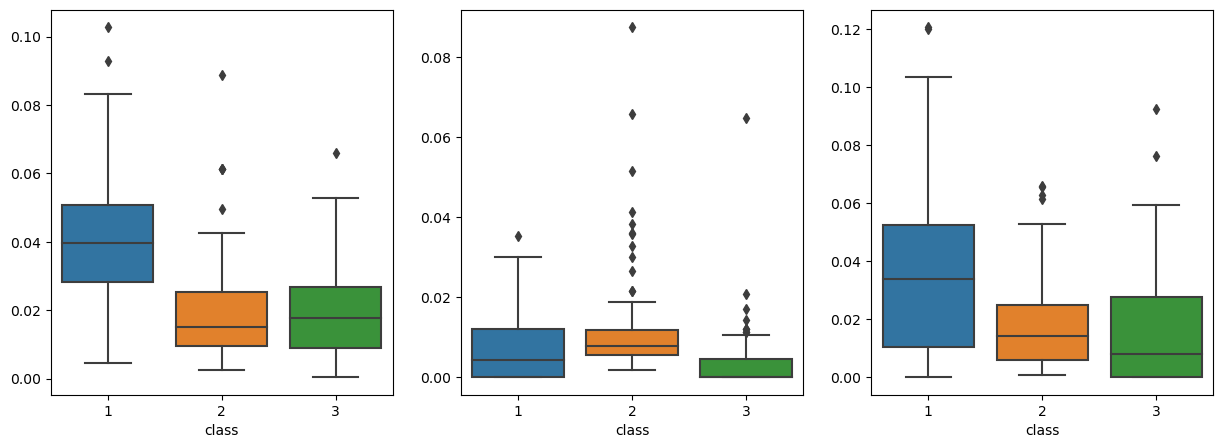

In [428]:
zero_crossing_x = []
zero_crossing_y = []
zero_crossing_z = []

for i in np.arange(len(li)):
    zero_crossing_x.append(len(np.where(np.diff(np.sign(li[i].x)))[0]) / len(li[i].x))
    zero_crossing_y.append(len(np.where(np.diff(np.sign(li[i].y)))[0]) / len(li[i].y))
    zero_crossing_z.append(len(np.where(np.diff(np.sign(li[i].z)))[0]) / len(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=zero_crossing_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=zero_crossing_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=zero_crossing_z,data=dfc,ax=axs[2])

#### Entropy

<AxesSubplot:xlabel='class'>

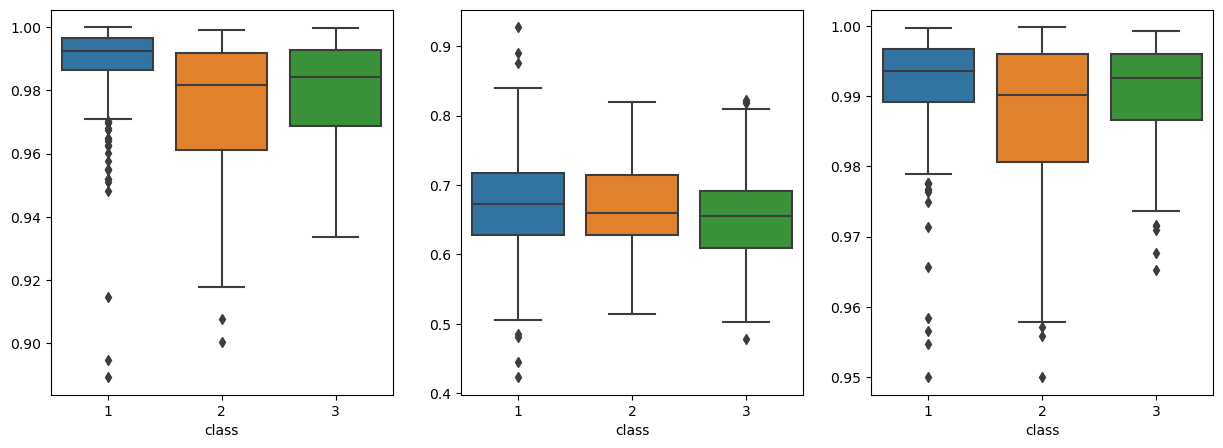

In [429]:
entropy_x = []
entropy_y = []
entropy_z = []

for i in np.arange(len(li)):
    valuex, countsx = np.unique(li[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li[i].x)) == 1:
        entropy_x.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li[i].x)) == 0:
        entropy_x.append(0)
    else:
        entropy_x.append(- np.sum(px * np.log2(px)) / np.log2(len(li[i].x)))
        
    valuey, countsy = np.unique(li[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li[i].y)) == 1:
        entropy_y.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li[i].y)) == 0:
        entropy_y.append(0)
    else:
        entropy_y.append(- np.sum(py * np.log2(py)) / np.log2(len(li[i].y)))
        
    valuez, countsz = np.unique(li[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li[i].z)) == 1:
        entropy_z.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)) == 0:
        entropy_z.append(0)
    else:
        entropy_z.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)))
   
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=entropy_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=entropy_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=entropy_z,data=dfc,ax=axs[2])

#### Interquartile Range

<AxesSubplot:xlabel='class'>

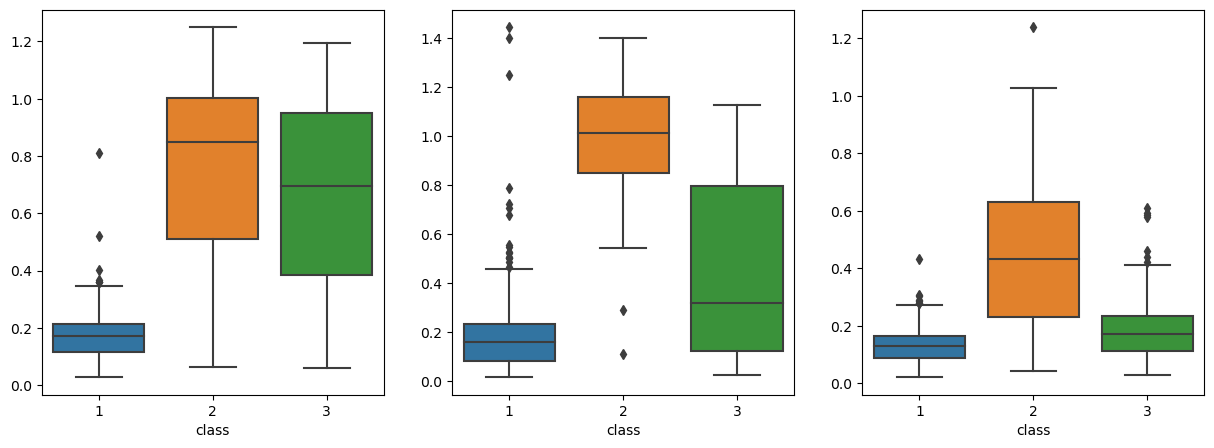

In [430]:
interq_x = []
interq_y = []
interq_z = []

for i in np.arange(len(li)):
    interq_x.append(np.percentile(li[i].x, 75) - np.percentile(li[i].x, 25))
    interq_y.append(np.percentile(li[i].y, 75) - np.percentile(li[i].y, 25))
    interq_z.append(np.percentile(li[i].z, 75) - np.percentile(li[i].z, 25))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=interq_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=interq_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=interq_z,data=dfc,ax=axs[2])

### **Create dataset**

In [431]:
columns = []
for prefix in ['x', 'y', 'z']:
    columns.append(f"mean_{prefix}")
    columns.append(f"var_{prefix}")
    
data = pd.DataFrame({'mean_x': means_x,
                     'mean_y': means_y,
                     'mean_z': means_z,
                     'var_x': vars_x,
                     'var_y': vars_y,
                     'var_z': vars_z,
                     'max-min_x': delta_x,
                     'max-min_y': delta_y,
                     'max-min_z': delta_z,
                     '%_peaks_x': peaks_x,
                     '%_peaks_y': peaks_y,
                     '%_peaks_z': peaks_z,
                     '%_positive_x': pn_x,
                     '%_positive_y': pn_y,
                     '%_positive_z': pn_z,
                     'power_x': powers_x,
                     'power_y': powers_y,
                     'power_z': powers_z,
                     'temporal_centroid_x': temporal_centroid_x,
                     'temporal_centroid_y': temporal_centroid_y,
                     'temporal_centroid_z': temporal_centroid_z,
                     
                    })
            
data = pd.concat([data,dflc],axis=1)
data = data.drop('code',axis=1)

data.to_csv('data.csv', index=False)

In [432]:
#sns.pairplot(data.iloc[:,:-1])  #df1 è il dataframe delle colonne con le variabili

<AxesSubplot:>

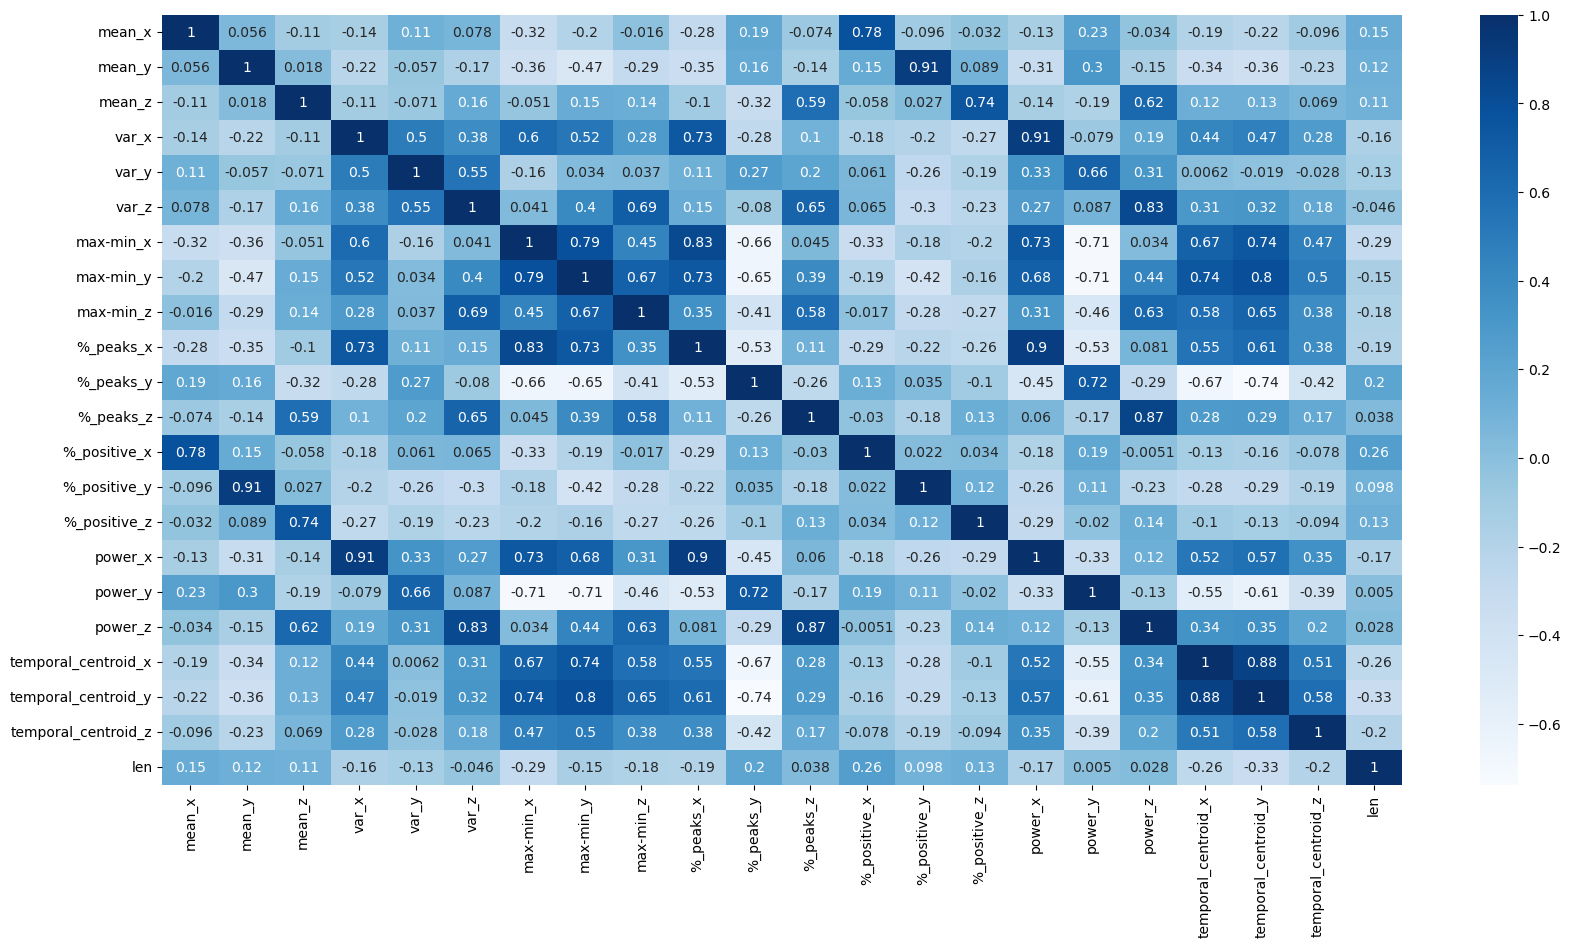

In [433]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues",) #a heat map to see the correlation among variable

In [434]:
data.duplicated().sum()

0

### **Classification**

In [435]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [436]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# # Create a logistic regression model
# clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# # Fit the model using the training data
# clf.fit(X_train, y_train)

# # Evaluate the model using the test data
# score = clf.score(X_test, y_test)
# print("Accuracy:", score)

# # Predict the classes using the test data
# y_pred = clf.predict(X_test)

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

In [437]:
# from lazypredict.Supervised import LazyClassifier
# cls= LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
# models, predictions = cls.fit(X_train, X_test, y_train, y_test)

In [438]:
#models

In [439]:
# # classifica con random forest il dataset data
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# # Fit the model using the training data
# clf.fit(X_train, y_train)

# # Evaluate the model using the test data
# score = clf.score(X_test, y_test)
# print("Accuracy:", score)

# # Predict the classes using the test data
# y_pred = clf.predict(X_test)

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # crea un dataset check con la classe originale e la classe predetta
# check = pd.DataFrame({'true': y_test, 'pred': y_pred})
# check

In [440]:
# # classifica con SVM il dataset data
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Create a SVM classifier
# clf = SVC(kernel='linear')

# # Fit the model using the training data
# clf.fit(X_train, y_train)

# # Evaluate the model using the test data
# score = clf.score(X_test, y_test)
# print("Accuracy:", score)

# # Predict the classes using the test data
# y_pred = clf.predict(X_test)

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # crea un dataset check con la classe originale e la classe predetta
# check = pd.DataFrame({'true': y_test, 'pred': y_pred})
# check


In [441]:
# # scegli con 10 fold cross validation il modello migliore
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# # Create a list of models
# models = [LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg'),
#             RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
#             SVC(kernel='linear')]
# # Create a list of model names
# model_names = ['Logistic Regression', 'Random Forest', 'SVM']

# # Loop through the models
# for model, name in zip(models, model_names):
#     # Calculate the accuracy score of the model using 10-fold cross validation
#     score = cross_val_score(model, X, y, cv=10)
#     # Print the name and score of the model
#     print(f"{name}: {score.mean()}")

In [442]:
# usa lazy predict per scegliere il modello migliore
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)

# # Create a lazy classifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# # Fit the model using the training data
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# models

In [443]:
# visualizza i risultati
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a figure
# plt.figure(figsize=(10, 5))

# # Create a barplot of the model accuracy
# sns.barplot(x=models.index, y=models['Accuracy'])

# # Rotate tick marks on x-axis
# plt.xticks(rotation=90)

# # Create labels
# plt.xlabel("Model")
# plt.ylabel("Accuracy")

# # Show plot
# plt.show()

In [444]:
# # fai feature importance con random forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# # Fit the model using the training data
# clf.fit(X_train, y_train)

# # Evaluate the model using the test data
# score = clf.score(X_test, y_test)
# print("Accuracy:", score)

# # Predict the classes using the test data
# y_pred = clf.predict(X_test)

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # crea un dataset check con la classe originale e la classe predetta
# check = pd.DataFrame({'true': y_test, 'pred': y_pred})
# check

# # Get the feature importances
# importances = clf.feature_importances_

# # Create a dataframe of feature importances, sorted descendingly
# data = pd.DataFrame({'feature': X.columns,
#                         'importance': importances}).sort_values('importance', ascending=False)

# # Display the first 10 most important features
# data.head(10)

# # Create a figure
# plt.figure(figsize=(10, 5))

# # Create a barplot of the feature importances
# sns.barplot(x=data.feature, y=data.importance)

# # Rotate tick marks on x-axis
# plt.xticks(rotation=90)

# # Create labels
# plt.xlabel("Features")
# plt.ylabel("Importance")

# # Show plot
# plt.show()

In [445]:
# # prova con vari seed e salva in una tabella accuracy, precision, recall, f1
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from IPython.display import display

# pd.options.display.float_format = '{:,.5f}'.format

# # Create lists for the scores
# accs, precs, recs, f1s = [], [], [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y, shuffle = True)

# # Loop through different random seeds
# for i in range(10):
#     # Create a random forest classifier
#     clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=i)

#     # Fit the model using the training data
#     clf.fit(X_train, y_train)

#     # Predict the classes using the test data
#     y_pred = clf.predict(X_test)

#     # Append the scores to the respective lists
#     accs.append(accuracy_score(y_test, y_pred))
#     precs.append(precision_score(y_test, y_pred, average='macro'))
#     recs.append(recall_score(y_test, y_pred, average='macro'))
#     f1s.append(f1_score(y_test, y_pred, average='macro'))

#     cm = confusion_matrix(y_test, y_pred)
#     print(cm, '\n\n')

# # Create a dataframe of the scores
# scores = pd.DataFrame({'accuracy': accs,
#                         'precision': precs,
#                         'recall': recs,
#                         'f1': f1s})

# # Print the mean scores
# scores

In [446]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

### **Cross-Validation**

#### SVM

In [447]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [1, 10, 100, 1000], },
  {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], }, 
]

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.9786628733997157


### Random Forest

In [448]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'max_depth': 15, 'n_estimators': 300}
0.9786628733997155


### Logistic Regression

In [450]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(multi_class='multinomial', random_state = 42, solver = 'newton-cg', max_iter = 1000)

scores = cross_validate(reglog, X_train_scaled, y_train, cv=10)

print(scores['test_score'].mean())

0.9733285917496446


### KNN

In [451]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20))}
grid_search = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

{'n_neighbors': 4}
0.9517780938833571


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [452]:
win_svm = svm.SVC(random_state=42, C=100, kernel='rbf')
win_rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog'],
                       'accuracy': [scores_svm['test_accuracy'].mean(), scores_rf['test_accuracy'].mean(), scores_reglog['test_accuracy'].mean()],
                       'precision': [scores_svm['test_precision_macro'].mean(), scores_rf['test_precision_macro'].mean(), scores_reglog['test_precision_macro'].mean()],
                       'recall': [scores_svm['test_recall_macro'].mean(), scores_rf['test_recall_macro'].mean(), scores_reglog['test_recall_macro'].mean()],
                       'f1': [scores_svm['test_f1_macro'].mean(), scores_rf['test_f1_macro'].mean(), scores_reglog['test_f1_macro'].mean()]
                       })

# Print the dataframe
scores

,model,accuracy,precision,recall,f1
0,svm,0.96266,0.96370,0.95268,0.95407
1,rf,0.97596,0.97150,0.97177,0.96979
2,reglog,0.96799,0.96623,0.96124,0.96159


array([[46,  0,  2],
       [17,  0,  3],
       [24,  0,  2]], dtype=int64)

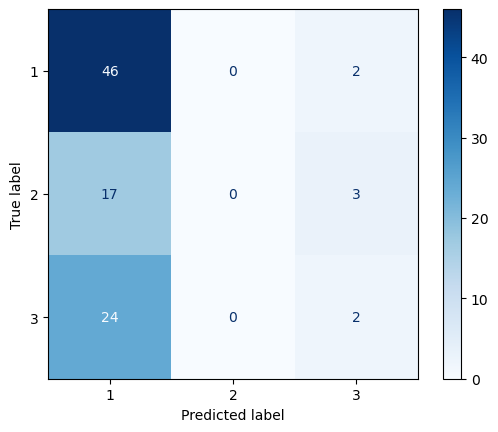

In [463]:
from sklearn.metrics import confusion_matrix

win_rf.fit(X_train, y_train)
y_pred = win_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_rf.classes_)
disp.plot(cmap='Blues')

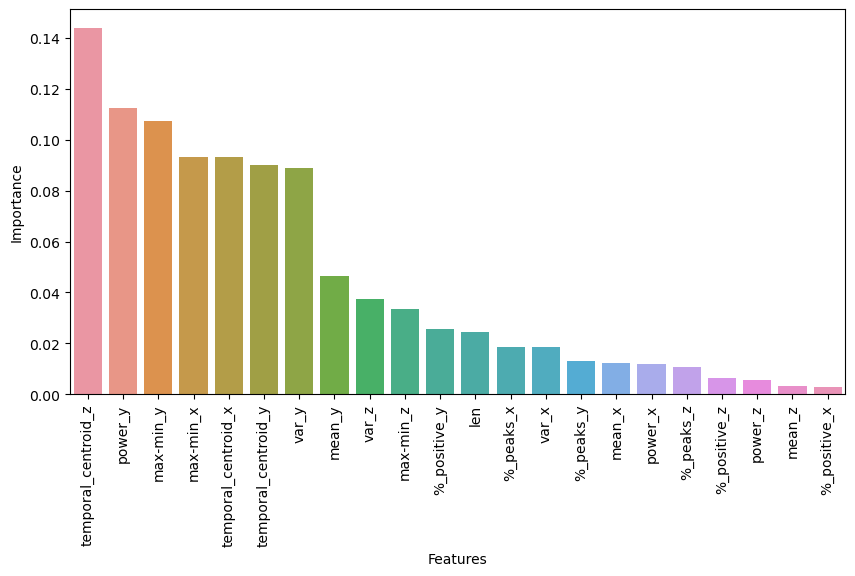

In [454]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': X.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()

In [455]:
XXX = X.iloc[:,feat.index[:10]]

# Split the data into train and test sets
XXX_train, XXX_test, y_train, y_test = train_test_split(XXX, y, test_size=0.2, random_state=42)
win_rf.fit(XXX_train, y_train)
y_pred = win_rf.predict(XXX_test)

cm = confusion_matrix(y_test, y_pred)

# get scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

[[48  0  0]
 [ 0 20  0]
 [ 1  1 24]]
0.9787234042553191
0.9773242630385487
0.9743589743589745
0.9751001592490152


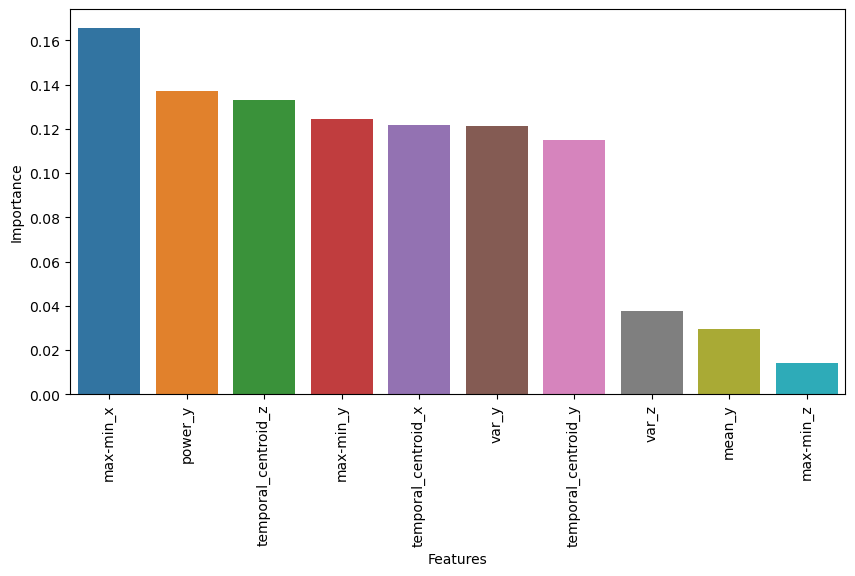

In [456]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': XXX.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()